# WeatherPy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import weather_api_key
from citipy import citipy
from datetime import datetime

# Generate Cities List

In [2]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
lat_lngs = []
cities = []

In [4]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [5]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

589

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
query_url = f"{url}appid={weather_api_key}&q="
response=requests.get(query_url).json()


In [7]:
#cities=
date=[]
country=[]
city_name=[]
lat=[]
lon=[]
temp=[] 
cloud=[]
humidity=[]
w_speed=[]

for city in cities:
    try:
        response=requests.get(query_url+city).json()
        #print(response)
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        lon.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp_max"])
        cloud.append(response["clouds"]['all'])
        humidity.append(response["main"]["humidity"])
        w_speed.append(response["wind"]["speed"])
       
    except Exception:
        print("City not found. Skipping...")

        

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [8]:
output_data_file = "output_data/cities.csv"

In [12]:
weather_df=pd.DataFrame({"Date":date,
                         "Country":country,
                         "City":city_name,
                         "Lat":lat,
                         "Lon":lon,
                         "Max Tem":temp,
                         "Cloudiness":cloud,
                         "Humidity":humidity,
                         "Wind Speed":w_speed})

In [31]:
weather_df.to_csv(output_data_file,index=False,header=True)
weather_df.count()

Date          546
Country       546
City          546
Lat           546
Lon           546
Max Tem       546
Cloudiness    546
Humidity      546
Wind Speed    546
dtype: int64

In [14]:
weather_df

,Date,Country,City,Lat,Lon,Max Tem,Cloudiness,Humidity,Wind Speed
0,1586564344,AR,Ushuaia,-54.80,-68.30,42.80,20,60,3.36
1,1586564344,PF,Atuona,-9.80,-139.03,82.24,79,78,11.10
2,1586564344,RU,Tsimmerbude,54.67,20.13,32.00,2,74,4.47
3,1586564111,NZ,Mataura,-46.19,168.86,63.00,0,70,4.00
4,1586564344,YT,Boueni,-12.90,45.08,82.40,6,78,5.82
...,...,...,...,...,...,...,...,...,...
541,1586564399,BR,São Borja,-28.66,-56.00,59.43,0,64,7.43
542,1586564399,IT,Rocca di Papa,41.77,12.70,57.99,0,70,4.70
543,1586564399,ID,Langsa,4.47,97.97,76.64,46,86,1.72
544,1586564399,ZM,Namwala,-15.75,26.44,62.19,94,70,3.76


In [15]:
pd.to_datetime(weather_df['Date'],unit='s')

0     2020-04-11 00:19:04
1     2020-04-11 00:19:04
2     2020-04-11 00:19:04
3     2020-04-11 00:15:11
4     2020-04-11 00:19:04
              ...        
541   2020-04-11 00:19:59
542   2020-04-11 00:19:59
543   2020-04-11 00:19:59
544   2020-04-11 00:19:59
545   2020-04-11 00:19:59
Name: Date, Length: 546, dtype: datetime64[ns]

# Latitude vs. Temperature Plot

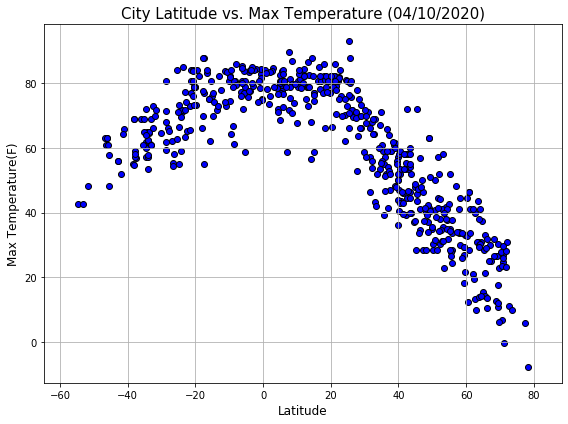

In [16]:
current_d=datetime.now().strftime("%m/%d/%Y")
x_axis=weather_df["Lat"]
y_axis=weather_df["Max Tem"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Max Temperature(F)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Max Temperature ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Max Tem"])-5,max(weather_df["Max Tem"])+5)
plt.grid()
plt.tight_layout()
plt.show()

#  Latitude vs. Humidity Plot

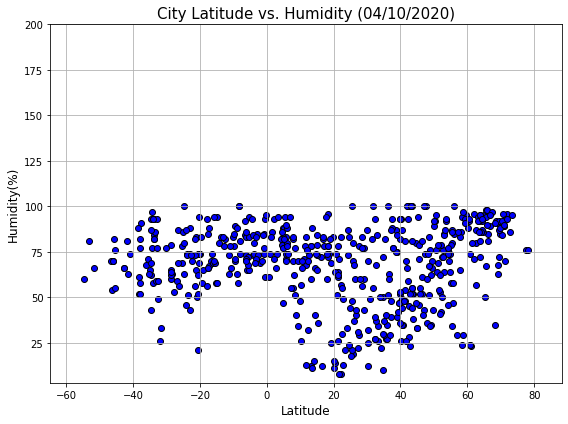

In [17]:
current_d=datetime.now().strftime("%m/%d/%Y")
x_axis=weather_df["Lat"]
y_axis=weather_df["Humidity"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Humidity(%)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Humidity ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Humidity"])-5,max(weather_df["Humidity"])+100)
plt.grid()
plt.tight_layout()
plt.show()

#  Latitude vs. Cloudiness Plot

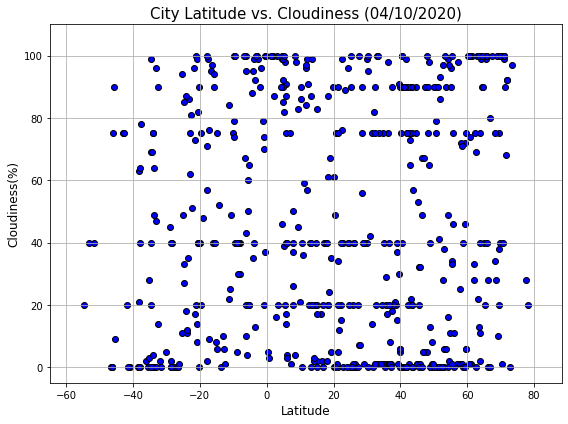

In [18]:
current_d=datetime.now().strftime("%m/%d/%Y")
x_axis=weather_df["Lat"]
y_axis=weather_df["Cloudiness"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Cloudiness(%)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Cloudiness ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Cloudiness"]-5),max(weather_df["Cloudiness"]+10))
plt.grid()
plt.tight_layout()
plt.show()

#  Latitude vs. Wind Speed Plot

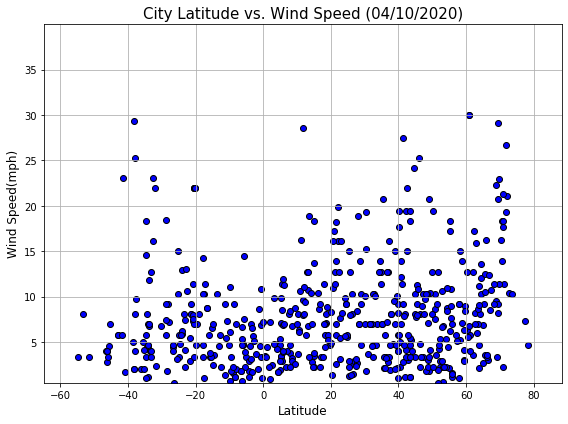

In [19]:
current_d=datetime.now().strftime("%m/%d/%Y")
x_axis=weather_df["Lat"]
y_axis=weather_df["Wind Speed"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Wind Speed(mph)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Wind Speed ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Wind Speed"]),max(weather_df["Wind Speed"]+10))
plt.grid()
plt.tight_layout()
plt.show()

# Linear Regression

In [20]:
s_hem=weather_df[weather_df["Lat"]<0]
n_hem=weather_df[weather_df["Lat"]>=0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
def line_reg(x_axis,y_axis,name_ylabel,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8,6))
    plt.scatter(x_axis,y_axis, marker="o", color="blue",edgecolor="black")
    plt.ylabel(name_ylabel,fontSize=11)
    plt.xlabel('Latitude',fontSize=11)
    plt.title(title,fontSize=12)
    plt.xticks(fontSize=10)
    plt.yticks(fontSize=10)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(min(x_axis),min(y_axis)),fontsize=15,color="red")
    plt.grid()
    plt.show()

The r-squared is: -0.9129104025523863


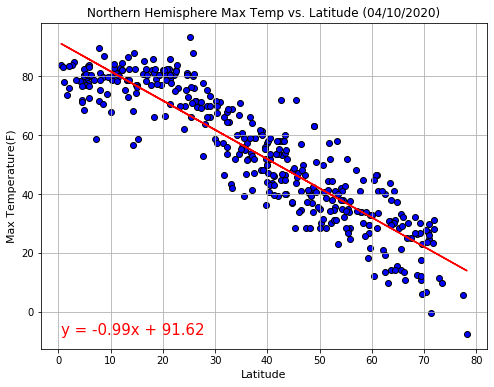

In [22]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Max Tem"]
name_ylabel="Max Temperature(F)"
title=f"Northern Hemisphere Max Temp vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7478989515160531


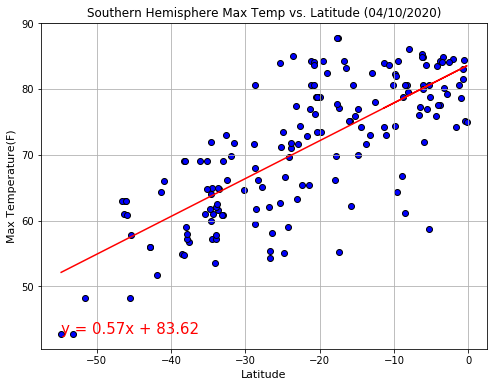

In [23]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Max Tem"]
name_ylabel="Max Temperature(F)"
title=f"Southern Hemisphere Max Temp vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22102376853914704


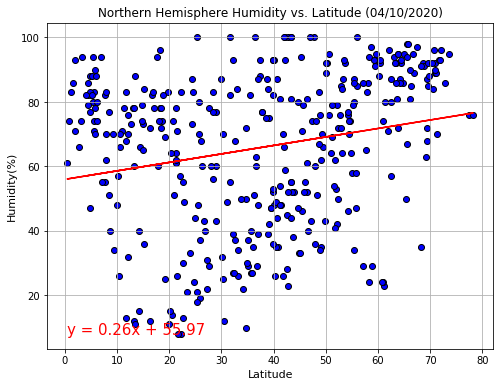

In [24]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Humidity"]
name_ylabel="Humidity(%)"
title=f"Northern Hemisphere Humidity vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22182111564872528


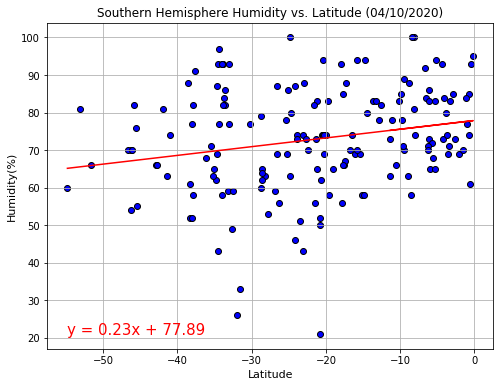

In [25]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Humidity"]
name_ylabel="Humidity(%)"
title=f"Southern Hemisphere Humidity vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

 #### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05109076499820309


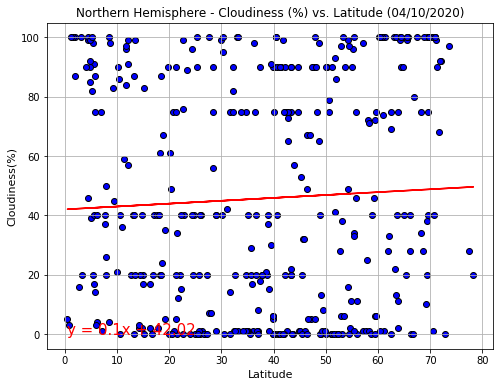

In [26]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Cloudiness"]
name_ylabel="Cloudiness(%)"
title=f"Northern Hemisphere - Cloudiness (%) vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.33861805708744214


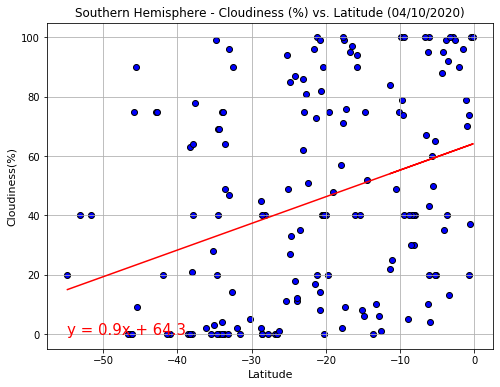

In [27]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Cloudiness"]
name_ylabel="Cloudiness(%)"
title=f"Southern Hemisphere - Cloudiness (%) vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1983889345032044


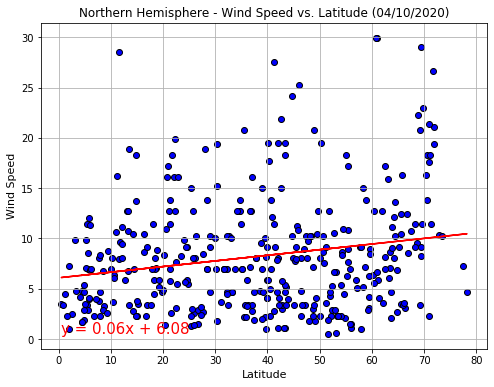

In [28]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Wind Speed"]
name_ylabel="Wind Speed"
title=f"Northern Hemisphere - Wind Speed vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.16317482539787154


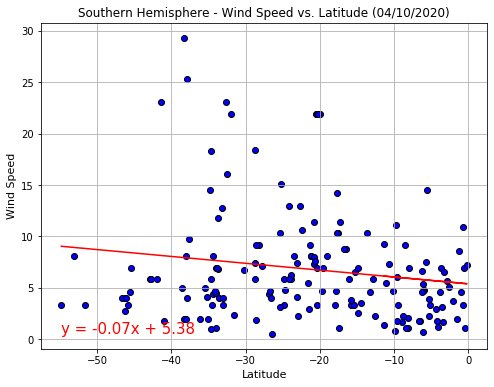

In [29]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Wind Speed"]
name_ylabel="Wind Speed"
title=f"Southern Hemisphere - Wind Speed vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)